# Evidence for Commodity Market Financialization from a Bayesian Perspective

In [1]:
from utils import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


In [2]:
xs = ['SPX', 'MSCI_W', 'MSCI_EM']

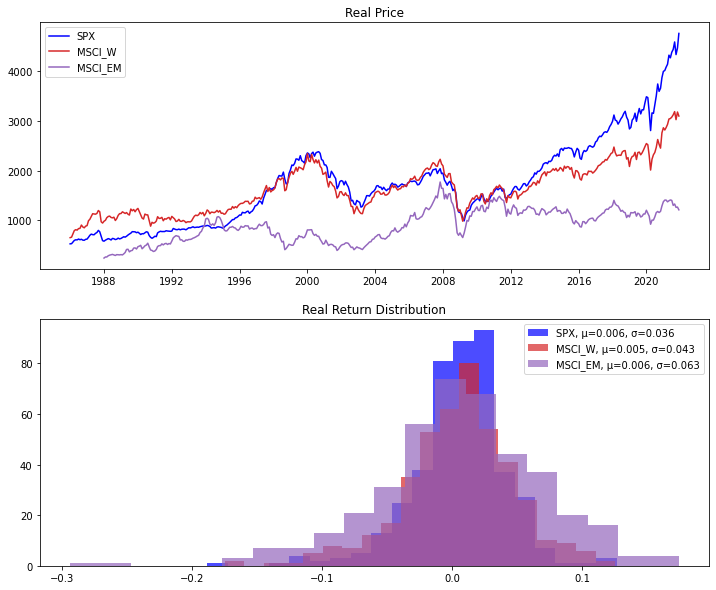

In [3]:
fig, ax = plt.subplots(2, figsize=(12,10))
ys = ['SPX', 'MSCI_W', 'MSCI_EM']
master = load('data/master.csv')
colours = ['blue', 'tab:red', 'tab:purple']
counter = 0
for y in ys:
    colour = colours[counter]
    ax[0].plot(master[y], label=y, color=colour)
    rets = master[y].pct_change()
    ax[1].hist(rets, bins=20, label=f'{y}, μ={round(rets.mean(), 3)}, σ={round(rets.std(),3)}', alpha=0.7, color=colour)
    counter += 1
ax[0].set_title('Real Price')
ax[1].set_title('Real Return Distribution')
ax[0].legend()
ax[1].legend()
plt.show()

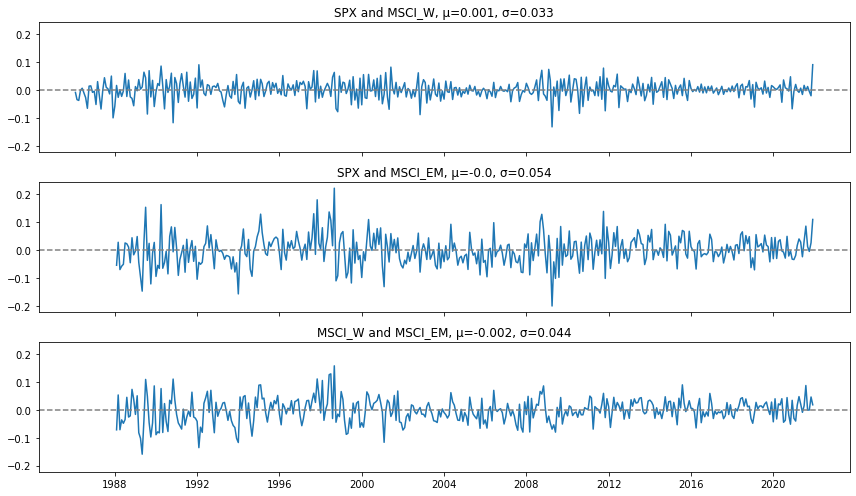

In [4]:
ks = ['SPX', 'MSCI_W']
ls = ['MSCI_W', 'MSCI_EM']
fig, ax = plt.subplots(3, figsize=(12,7), sharex=True, sharey=True)
axes = 0
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        y = ls[j]
        if x == 'MSCI_W' and y == 'MSCI_W':
            continue
        data = master[x].pct_change() - master[y].pct_change()
        ax[axes].set_title(f'{x} and {y}, μ={round(data.mean(), 3)}, σ={round(data.std(), 3)}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        axes += 1
plt.tight_layout()
plt.show()

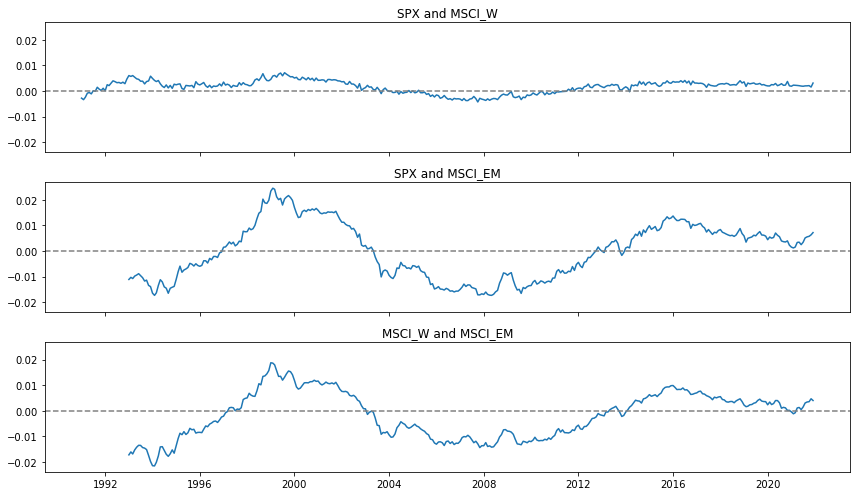

In [5]:
ks = ['SPX', 'MSCI_W']
ls = ['MSCI_W', 'MSCI_EM']
fig, ax = plt.subplots(3, figsize=(12,7), sharex=True, sharey=True)
axes = 0
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        y = ls[j]
        if x == 'MSCI_W' and y == 'MSCI_W':
            continue
        data = (master[x].pct_change() - master[y].pct_change()).rolling(60).mean()
        ax[axes].set_title(f'{x} and {y}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        axes += 1
plt.tight_layout()
plt.show()

## 1. Is there a difference between indexed and non-indexed commodities?

### 1.1 Indexed

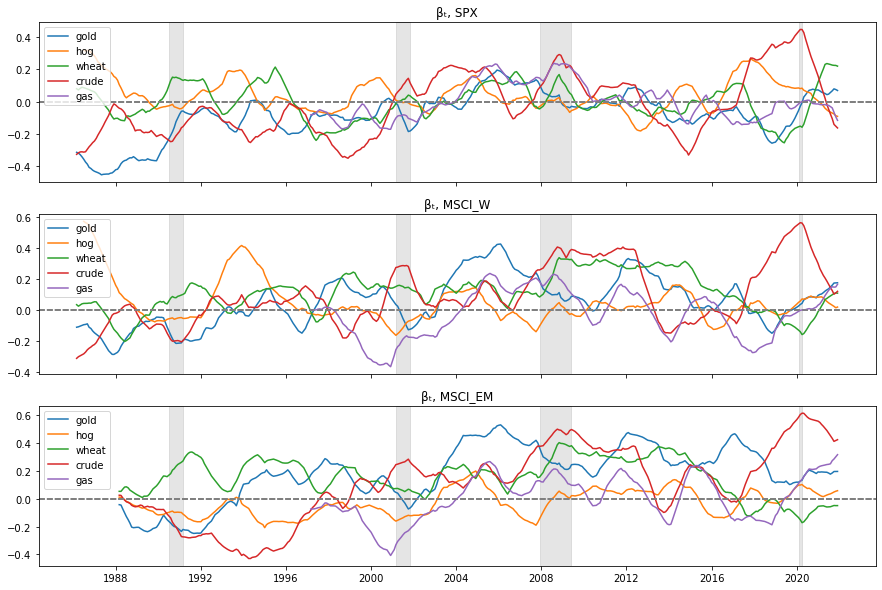

In [6]:
ys = ['gold','hog', 'wheat', 'crude', 'gas']
multi_plot(ys, xs, data='betas', title_deets='βₜ, ')

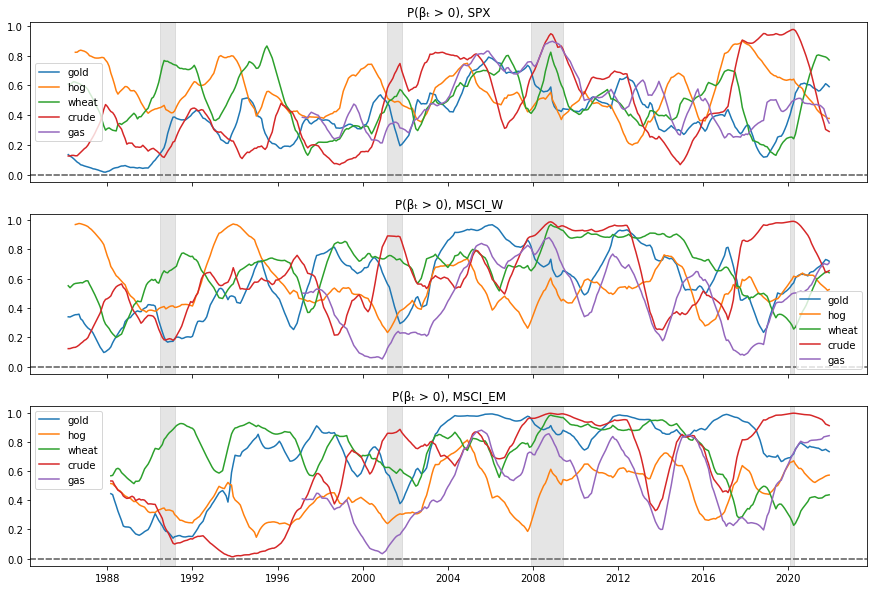

In [7]:
multi_plot(ys, xs, data='probs', title_deets='P(βₜ > 0), ')

### 1.2 Non-Indexed

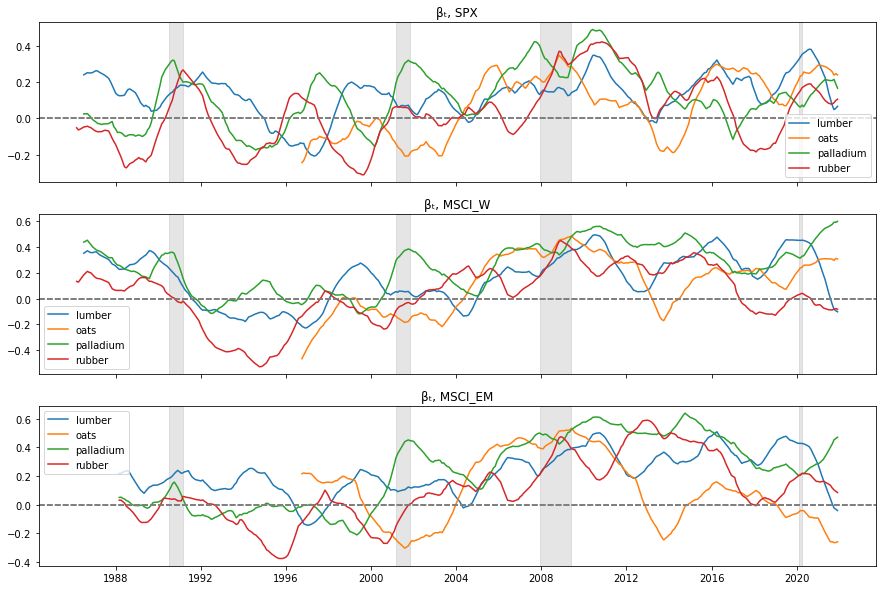

In [8]:
ys = ['lumber', 'oats', 'palladium', 'rubber']
multi_plot(ys, xs, data='betas', title_deets='βₜ, ')

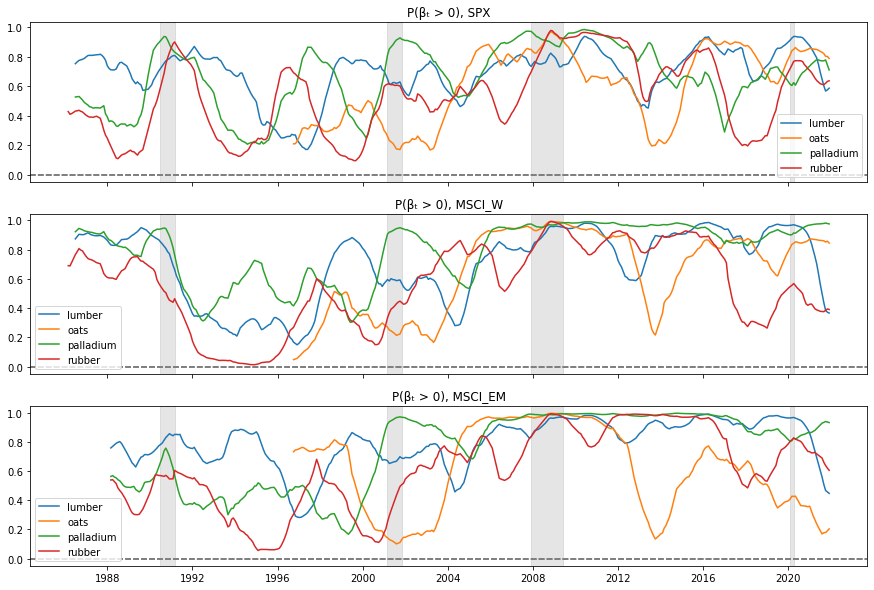

In [9]:
multi_plot(ys, xs, data='probs', title_deets='P(βₜ > 0), ')

It appears that non-indexed commodities are actually behaving slightly more homogenously than indexed with regards to equity market integration, which goes against the risk-sharing theory. However, what of indices themselves?

## 2. Commodity Indices

### 2.1 Comparison of returns between GSCI, DJCI, BCI and CRBI

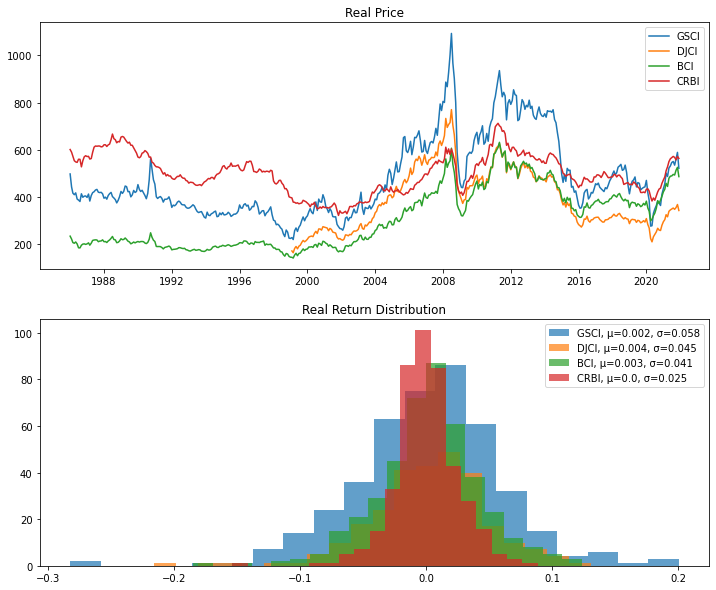

In [10]:
fig, ax = plt.subplots(2, figsize=(12,10))
ys = ['GSCI', 'DJCI', 'BCI', 'CRBI']
for y in ys:
    ax[0].plot(master[y], label=y)
    rets = master[y].pct_change()
    ax[1].hist(rets, bins=20, label=f'{y}, μ={round(rets.mean(), 3)}, σ={round(rets.std(),3)}', alpha=0.7)
ax[0].set_title('Real Price')
ax[1].set_title('Real Return Distribution')
ax[0].legend()
ax[1].legend()
plt.show()

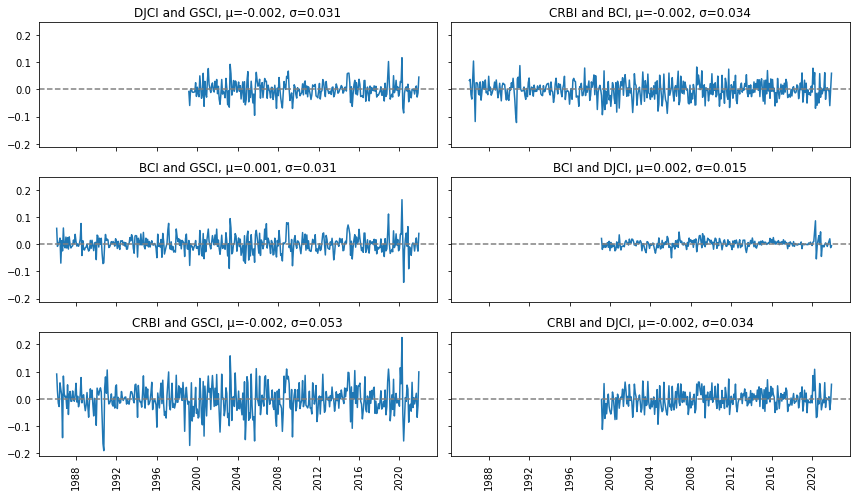

In [11]:
ks = ['DJCI', 'BCI', 'CRBI']
ls = ['GSCI', 'DJCI']
fig, ax = plt.subplots(3, 2, figsize=(12,7), sharex=True, sharey=True)
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        axes = (i, j)
        y = ls[j]
        if x == 'DJCI' and y == 'DJCI':
            x = 'CRBI'
            y = 'BCI'
        data = master[x].pct_change() - master[y].pct_change()
        ax[axes].set_title(f'{x} and {y}, μ={round(data.mean(), 3)}, σ={round(data.std(), 3)}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        ax[axes].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

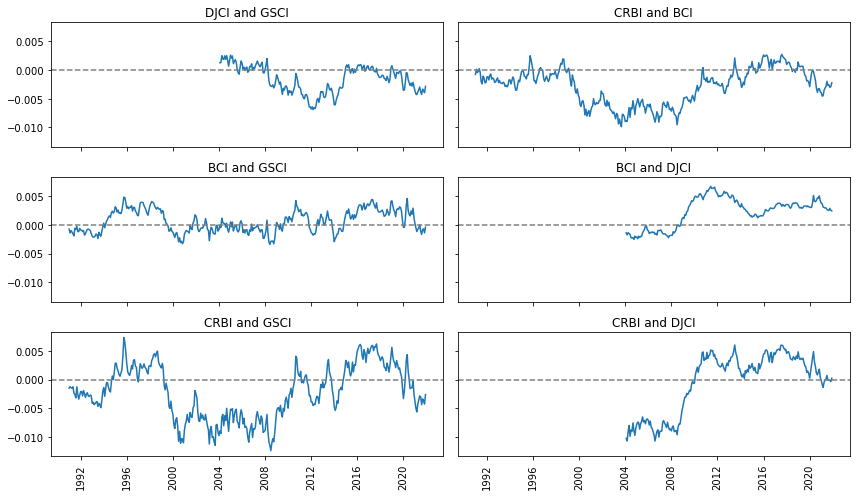

In [12]:
ks = ['DJCI', 'BCI', 'CRBI']
ls = ['GSCI', 'DJCI']
fig, ax = plt.subplots(3, 2, figsize=(12,7), sharex=True, sharey=True)
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        axes = (i, j)
        y = ls[j]
        if x == 'DJCI' and y == 'DJCI':
            x = 'CRBI'
            y = 'BCI'
        data = (master[x].pct_change() - master[y].pct_change()).rolling(60).mean()
        ax[axes].set_title(f'{x} and {y}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        ax[axes].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

As can be seen, GSCI, DJCI, BCI and CRBI behave differently largely due to the different weightings used. GSCI is a production-weighted index, while DJCI is a liquidity-weighted index that tries to maintain equal diversification weighting. BCI incorporates both production and liquidity into account. CRBI is composed of usually un-indexed commodities, weighted by the calculation of geometric mean.

### 2.2 Comparison of equity market integration between GSCI, DJCI BCI and CRBI

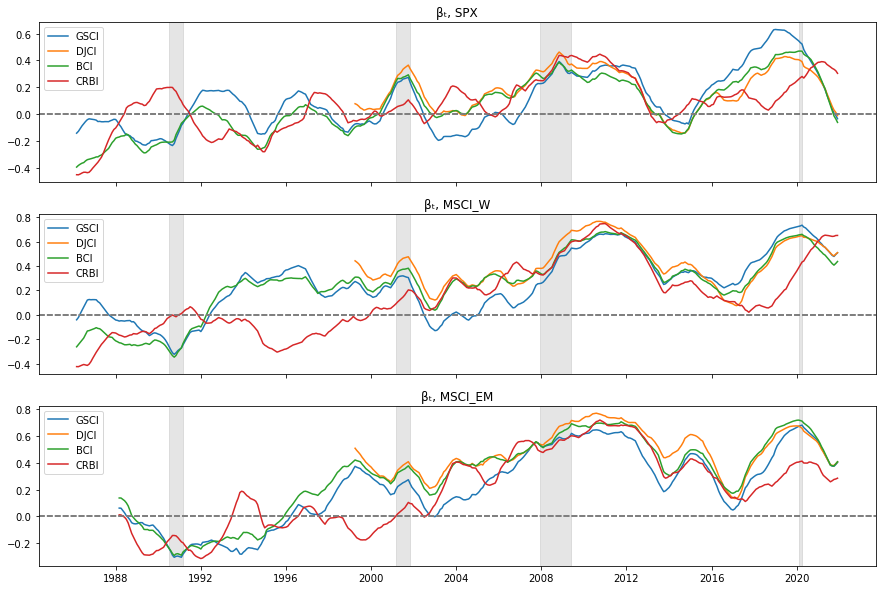

In [13]:
ys = ['GSCI', 'DJCI', 'BCI', 'CRBI']
multi_plot(ys, xs, data='betas', title_deets='βₜ, ')

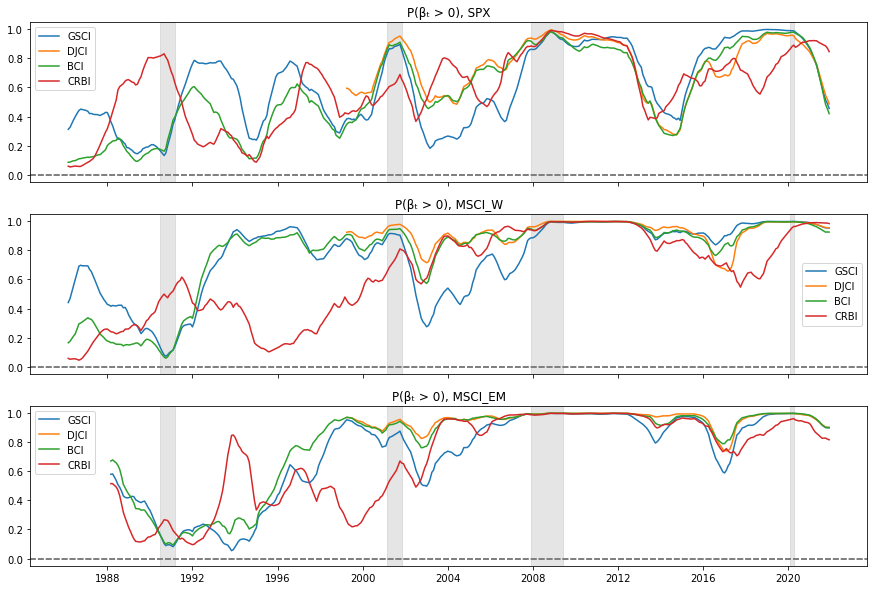

In [14]:
multi_plot(ys, xs, data='probs', title_deets='P(βₜ > 0), ')

It appears that despite the difference in index construction, the level of equity market integration remains consistent between the two indices, supporting the risk-sharing theory. The only difference is with indexed commodities - since the CRBI includes usually un-indexed commodities like scrap metal and tallow, it is slower to integrate.

### 2.3 GSECI and GSNECI integration

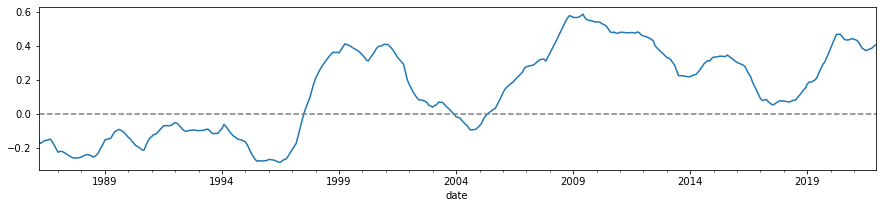

In [15]:
plt.figure(figsize=(15,3))
load('data/saved/betas.csv')['GSECI-GSNECI-smth'].plot()
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

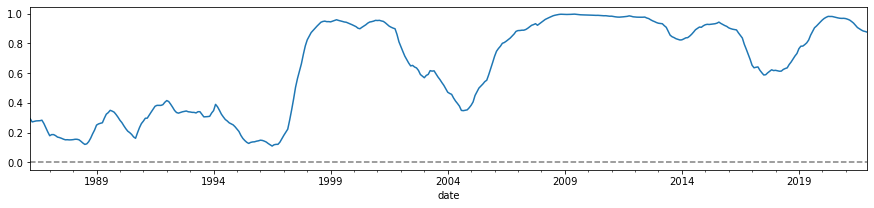

In [16]:
plt.figure(figsize=(15,3))
load('data/saved/probs.csv')['GSECI-GSNECI-smth'].plot()
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

This is good evidence that index speculation does have an effect - because both non-energy and energy indices are included in general index, so any time someone buys an index-tracking product they allocate capital to both markets, increasing integration. The sudden rise in integration coincides with the data for index speculation and financialization.

## 3. Robustness Testing

In [17]:
master_p = master.pct_change()

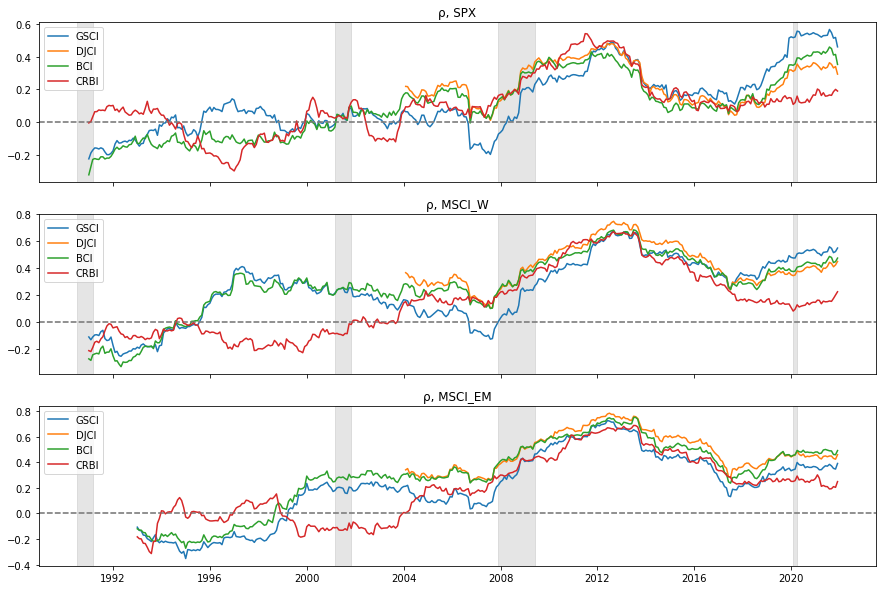

In [18]:
fig, ax = plt.subplots(3, figsize=(15, 10), sharex=True)
ax_count = 0
r = pd.read_csv('data/recessions.csv')
for x in xs:
    for y in ys:
        ax[ax_count].set_title(f'ρ, {x}')
        ax[ax_count].plot(rolling_corr(clean_series(y, master_p).join(clean_series(x, master_p)), lags=60, plot=False), label=y)
        ax[ax_count].axhline(0, linestyle='--', color='grey', alpha=0.5)
    for index, row in r.iterrows():
        ax[ax_count].axvspan(pd.to_datetime(row['start'], dayfirst=True), pd.to_datetime(row['end'], dayfirst=True), color='grey', alpha=0.2)
    ax[ax_count].legend()
    ax_count += 1

## 4. Conclusion
There is strong evidence that index speculation does increase integration between commodity indices and the equity market, and between sub-indices themselves. However, there is little evidence of sustained impact on singular commodities, most likely to the annual adjustment of index weights, which alters capital allocation through the index into the futures market and hence alters the level of integration for individual commodities. For indices, weighting does not affect the level of integration because speculators buy the index directly and so capital allocation is consistent for the index.

So what does this tell us? Instead of Masters' (2008) theory that index speculation is to blame for commodity bubbles, a more subtle mechanism is at work. Commodity indices adjust weights based on the level of global production (GSCI) or rolling average of trading volume (DJCI), so capital allocation is still based on some economic fundamentals. However, index speculation does amplify the effect of pre-existing shifts in fundamentals, such as an increse in production or trading. Hence a commodity is only going to decouple from fundamentals if the indicators used by indices have departed from fundamentals. This brings to mind Soros' (1987) theory of feedback loops, where the market has mechanisms of self-reinforcing its own beliefs. As we've demonstrated, commodity indices are a part of that mechanism.